In [ ]:
from gensim.models import Word2Vec
 
from nltk.cluster import KMeansClusterer
import nltk
 
 
from sklearn import cluster
from sklearn import metrics
 
# training data
 
sentences = [['organisms','respiration'],['photosynthesis','plants'],['enzymes','enzyme', 'cell'], ['reactions', 'bloodtissue']]
 
 
# training model
model = Word2Vec(sentences, min_count=1)
 
# get vector data
X = model[model.wv.vocab]
print (X)
 

 
 
 
NUM_CLUSTERS=5
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)
 
words = list(model.wv.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))
 
 
 
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 


[[ 1.32205524e-03 -5.67856710e-04  3.87534592e-03 -5.41479618e-04
   4.05496173e-03  2.96197389e-03 -2.49271491e-03  1.42254797e-03
   2.80983731e-05 -3.57102545e-04  1.24871254e-03  4.98516811e-03
   4.35470510e-03  4.36784327e-03 -2.75256112e-03  3.16279079e-03
  -3.31119681e-03 -3.00097000e-03  3.28591646e-04 -3.41401901e-03
  -3.63579858e-03  3.64118535e-03 -3.07730195e-04 -2.05409038e-03
  -4.26678360e-03 -4.12809942e-03  5.50394354e-04 -3.01382202e-03
  -1.16441271e-03  1.94850101e-04 -1.76623685e-03  3.54932155e-03
   1.07663672e-03  4.35144966e-03 -1.16667524e-03 -5.10863960e-04
  -8.45961447e-04  1.70421659e-03  1.35455246e-03  2.07314733e-03
  -1.53853174e-03 -5.73194004e-04  1.15750032e-03 -3.12261400e-03
   1.87511917e-03 -1.49744650e-04  2.73456867e-03 -3.39387893e-03
   4.76040319e-03 -2.32283119e-03 -3.02161276e-03  7.05736689e-04
  -2.56989850e-03 -1.49444933e-03 -1.81521988e-04 -4.40203206e-04
   1.86453725e-03 -4.96920943e-03 -3.67890205e-03  1.52892107e-03
   1.43827

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [ ]:
y=kmeans.predict(X)

In [ ]:
y

array([0, 1, 0, 1, 2, 0, 2, 0, 1], dtype=int32)

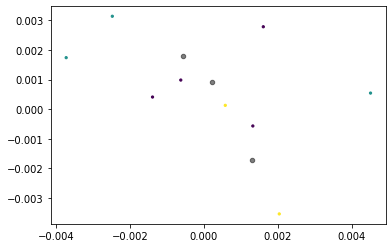

In [ ]:
import matplotlib.pyplot as plt
 
plt.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, alpha=0.5);